In [2]:
#importing data frame churn
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
churn = pd.read_csv('churn.csv')
churn

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
5,9305-CDSKC,Female,0,No,No,8,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.5,Yes
6,1452-KIOVK,Male,0,No,Yes,22,Yes,Yes,Fiber optic,No,...,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.4,No
7,6713-OKOMC,Female,0,No,No,10,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,No,Mailed check,29.75,301.9,No
8,7892-POOKP,Female,0,Yes,No,28,Yes,Yes,Fiber optic,No,...,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes
9,6388-TABGU,Male,0,No,Yes,62,Yes,No,DSL,Yes,...,No,No,No,No,One year,No,Bank transfer (automatic),56.15,3487.95,No


In [3]:
churn.shape # showing shape of dataframe churn

(7043, 21)

In [4]:
churn.isnull().sum() #showing missing values in data frame churn

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [5]:
churn.dtypes #showing data type of columns in dataframe churn

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [6]:
churn['Churn']=churn['Churn'].map({'Yes':1,'No':0}) #converting values of column churn yes or no to 1 or 0

In [7]:
from statsmodels.stats.outliers_influence import variance_inflation_factor #importing VIF for checking multicolinearity of features
filtered_sample = []
for column in churn.columns:
    if churn[column].dtypes == 'int64' or churn[column].dtypes == 'float64':
        filtered_sample.append(column)
filtered_sample
churn1 = churn[filtered_sample]
churn1
vif= pd.DataFrame()
vif['factor']= [variance_inflation_factor(churn1.values, i) for i in range(churn1.shape[1])]
vif #since coefficient is not varying that much so no dropping of the columns

,factor
0,1.269894
1,3.031276
2,4.230198
3,1.647988


In [8]:
vif.round(0) #to round of the values

,factor
0,1.0
1,3.0
2,4.0
3,2.0


In [9]:
#checking correlation between categorical(outcome and input variables) by chi-square test
#import scipy.stats 
#crosstab = pd.crosstab(churn['customerID'],churn['Churn'])
#crosstab1 = pd.crosstab(churn['gender'],churn['Churn'])
#crosstab3 = pd.crosstab(churn['Partner'],churn['Churn'])
#crosstab4 = pd.crosstab(churn['Dependents'],churn['Churn'])
#crosstab6 = pd.crosstab(churn['PhoneService'],churn['Churn'])
#crosstab7 = pd.crosstab(churn['MultipleLines'],churn['Churn'])
#crosstab8 = pd.crosstab(churn['InternetService'],churn['Churn'])
#crosstab9 = pd.crosstab(churn['OnlineSecurity'],churn['Churn'])
#crosstab10 = pd.crosstab(churn['OnlineBackup'],churn['Churn'])
#crosstab11 = pd.crosstab(churn['DeviceProtection'],churn['Churn'])
#crosstab12 = pd.crosstab(churn['TechSupport'],churn['Churn'])
#crosstab14 = pd.crosstab(churn['StreamingTV'],churn['Churn'])
#crosstab15 = pd.crosstab(churn['StreamingMovies'],churn['Churn'])
#crosstab16 = pd.crosstab(churn['Contract'],churn['Churn'])
#crosstab17 = pd.crosstab(churn['StreamingTV'],churn['Churn'])
#crosstab18 = pd.crosstab(churn['PaperlessBilling'],churn['Churn'])
#crosstab20 = pd.crosstab(churn['TotalCharges'],churn['Churn'])

#crosstab
#scipy.stats.chi2_contingency(crosstab)
#scipy.stats.chi2_contingency(crosstab1)
#scipy.stats.chi2_contingency(crosstab2)
#scipy.stats.chi2_contingency(crosstab3)
#scipy.stats.chi2_contingency(crosstab4)
#scipy.stats.chi2_contingency(crosstab5)
#scipy.stats.chi2_contingency(crosstab6)
#scipy.stats.chi2_contingency(crosstab7)
#scipy.stats.chi2_contingency(crosstab8)
#scipy.stats.chi2_contingency(crosstab9)
#scipy.stats.chi2_contingency(crosstab10)
#scipy.stats.chi2_contingency(crosstab11)
#scipy.stats.chi2_contingency(crosstab12)
#scipy.stats.chi2_contingency(crosstab14)
#scipy.stats.chi2_contingency(crosstab15)
#scipy.stats.chi2_contingency(crosstab16)
#scipy.stats.chi2_contingency(crosstab17)
#scipy.stats.chi2_contingency(crosstab18)
#scipy.stats.chi2_contingency(crosstab19)
#scipy.stats.chi2_contingency(crosstab20)

#we cant drop every column as there is no correlation between outcome and input variables,but we are not dropping for model builing


In [10]:
 #importing train and test for model building
from sklearn.model_selection import train_test_split 
y = churn['Churn']
churn.drop(columns='Churn',inplace=True)

X_train,X_test,y_train,y_test = train_test_split( churn,y,test_size=0.2,random_state=24)


In [11]:
X_train

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
5143,5204-HMGYF,Female,0,Yes,Yes,49,Yes,No,DSL,Yes,Yes,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,87.20,4345
2387,6734-GMPVK,Male,0,No,No,5,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,Month-to-month,No,Electronic check,105.30,550.6
4752,1682-VCOIO,Male,0,No,No,23,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,No,Mailed check,20.45,481.1
1066,9646-NMHXE,Male,0,Yes,No,47,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.65,973.1
2635,9953-ZMKSM,Male,0,No,No,63,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.25,1559.3
1788,7416-CKTEP,Female,0,Yes,No,57,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,Yes,Bank transfer (automatic),19.60,1134.25
3966,8915-NNTRC,Male,0,Yes,Yes,72,Yes,Yes,Fiber optic,Yes,Yes,No,Yes,Yes,Yes,Two year,Yes,Credit card (automatic),107.70,7919.8
2420,3694-DELSO,Male,0,Yes,Yes,4,No,No phone service,DSL,Yes,No,No,No,Yes,No,Month-to-month,No,Credit card (automatic),38.55,156.1
6579,3938-YFPXD,Male,0,No,No,72,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,Two year,No,Credit card (automatic),84.30,5997.1
1738,8646-JCOMS,Female,0,Yes,No,66,Yes,Yes,Fiber optic,No,Yes,Yes,Yes,No,No,One year,Yes,Bank transfer (automatic),90.55,6130.95


In [12]:
#label encoding the categorical columns present in our train data
from sklearn.preprocessing import LabelEncoder

X_train,X_test,y_train,y_test = train_test_split(churn,y,test_size=0.2,random_state=24)

le=LabelEncoder()

for col in X_train.columns:
    if X_train[col].dtype=='object':
            #X_train[col]=X_train[col].append(X_train[col])
            X_train[col]=le.fit_transform(X_train[col].astype(str))
            #X_train[col]=le.transform(X_train[col])
X_train

C:\Users\user\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # This is added back by InteractiveShellApp.init_path()


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
5143,2967,0,0,1,1,49,1,0,0,2,2,2,2,2,2,1,1,3,87.20,2995
2387,3836,1,0,0,0,5,1,2,1,0,2,2,0,2,2,0,0,2,105.30,3698
4752,928,1,0,0,0,23,1,0,2,1,1,1,1,1,1,1,0,3,20.45,3299
1066,5431,1,0,1,0,47,1,0,2,1,1,1,1,1,1,2,0,3,19.65,5265
2635,5610,1,0,0,0,63,1,2,2,1,1,1,1,1,1,2,0,3,25.25,814
1788,4215,0,0,1,0,57,1,0,2,1,1,1,1,1,1,2,1,0,19.60,210
3966,5037,1,0,1,1,72,1,2,1,2,2,0,2,2,2,2,1,1,107.70,4843
2420,2066,1,0,1,1,4,0,1,0,2,0,0,0,2,0,0,0,1,38.55,816
6579,2221,1,0,0,0,72,1,2,0,2,0,2,2,2,2,2,0,1,84.30,3963
1738,4881,0,0,1,0,66,1,2,1,0,2,2,2,0,0,1,1,0,90.55,4047


In [15]:
#label encoding the categorical columns present in our test data
from sklearn.preprocessing import LabelEncoder

le=LabelEncoder()

for col in X_test.columns:
    if X_test[col].dtype=='object':
            #X_train[col]=X_train[col].append(X_train[col])
            X_test[col]=le.transform(X_test[col].astype(str))
            #X_train[col]=le.transform(X_train[col])
X_test

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
261,507,1,1,0,0,13,1,2,1,0,2,2,0,2,2,0,1,2,106.90,138
490,499,1,0,1,1,63,1,2,1,0,2,2,0,2,2,2,1,0,104.80,1105
3026,875,0,0,1,0,16,1,2,1,0,0,0,0,2,0,0,1,2,84.95,142
6619,384,0,0,0,0,9,1,0,2,1,1,1,1,1,1,0,0,0,20.15,436
2677,351,0,0,0,0,4,1,0,1,0,0,0,0,0,0,0,1,1,70.05,500
2767,502,0,0,0,1,46,1,2,1,0,0,2,2,0,0,0,1,0,84.80,707
2629,700,1,0,0,0,2,1,0,1,0,0,0,0,0,0,0,0,1,70.70,153
3973,481,0,0,1,1,43,0,1,0,2,0,2,2,2,2,1,1,1,60.40,494
3643,1338,0,0,1,0,53,1,0,2,1,1,1,1,1,1,1,0,1,19.05,1379
1820,1071,0,0,1,0,6,1,0,0,0,0,0,0,0,0,0,0,3,45.65,609


In [16]:
from sklearn.tree import DecisionTreeClassifier # importing decisiontreeclassifier from sklearn.tree to do classification

decision = DecisionTreeClassifier()

decision.fit(X_train,y_train)
predicted = decision.predict(X_test)
predicted

array([1, 1, 1, ..., 0, 0, 1], dtype=int64)

In [17]:
from sklearn.ensemble import RandomForestClassifier # importing randomforestclassifier from sklearn.tree to do classification
rf = RandomForestClassifier(n_estimators=60,random_state=42)
rf.fit(X_train,y_train)
pred=rf.predict(X_test)
pred

array([1, 0, 1, ..., 0, 0, 0], dtype=int64)

In [18]:
import numpy as np
from sklearn.model_selection import RandomizedSearchCV #importing randomizedsearchcv for hyperparameter tunning
tuning={ 'n_estimators':np.arange(10,200,10),
          'max_depth':[5,6,7,8,9],
          'min_samples_leaf':[2,3,4,5,6],
          'min_samples_split':[6,7,8,9,10],
          'max_leaf_nodes':[2,3,4,5,6]}
         
rd = RandomizedSearchCV(estimator=rf,param_distributions=tuning,n_iter=15,cv=5,verbose=10,random_state=24)
rd.fit(X_train,y_train)
rd.best_params_


Fitting 5 folds for each of 15 candidates, totalling 75 fits
[CV] n_estimators=70, min_samples_split=8, min_samples_leaf=6, max_leaf_nodes=3, max_depth=5 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  n_estimators=70, min_samples_split=8, min_samples_leaf=6, max_leaf_nodes=3, max_depth=5, score=0.738, total=   0.6s
[CV] n_estimators=70, min_samples_split=8, min_samples_leaf=6, max_leaf_nodes=3, max_depth=5 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.5s remaining:    0.0s


[CV]  n_estimators=70, min_samples_split=8, min_samples_leaf=6, max_leaf_nodes=3, max_depth=5, score=0.752, total=   0.6s
[CV] n_estimators=70, min_samples_split=8, min_samples_leaf=6, max_leaf_nodes=3, max_depth=5 


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    1.1s remaining:    0.0s


[CV]  n_estimators=70, min_samples_split=8, min_samples_leaf=6, max_leaf_nodes=3, max_depth=5, score=0.751, total=   0.5s
[CV] n_estimators=70, min_samples_split=8, min_samples_leaf=6, max_leaf_nodes=3, max_depth=5 


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    1.6s remaining:    0.0s


[CV]  n_estimators=70, min_samples_split=8, min_samples_leaf=6, max_leaf_nodes=3, max_depth=5, score=0.749, total=   0.5s
[CV] n_estimators=70, min_samples_split=8, min_samples_leaf=6, max_leaf_nodes=3, max_depth=5 


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    2.1s remaining:    0.0s


[CV]  n_estimators=70, min_samples_split=8, min_samples_leaf=6, max_leaf_nodes=3, max_depth=5, score=0.754, total=   0.6s
[CV] n_estimators=50, min_samples_split=10, min_samples_leaf=6, max_leaf_nodes=4, max_depth=8 


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    2.7s remaining:    0.0s


[CV]  n_estimators=50, min_samples_split=10, min_samples_leaf=6, max_leaf_nodes=4, max_depth=8, score=0.781, total=   0.5s
[CV] n_estimators=50, min_samples_split=10, min_samples_leaf=6, max_leaf_nodes=4, max_depth=8 


[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    3.3s remaining:    0.0s


[CV]  n_estimators=50, min_samples_split=10, min_samples_leaf=6, max_leaf_nodes=4, max_depth=8, score=0.767, total=   0.4s
[CV] n_estimators=50, min_samples_split=10, min_samples_leaf=6, max_leaf_nodes=4, max_depth=8 


[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    3.6s remaining:    0.0s


[CV]  n_estimators=50, min_samples_split=10, min_samples_leaf=6, max_leaf_nodes=4, max_depth=8, score=0.773, total=   0.5s
[CV] n_estimators=50, min_samples_split=10, min_samples_leaf=6, max_leaf_nodes=4, max_depth=8 


[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    4.2s remaining:    0.0s


[CV]  n_estimators=50, min_samples_split=10, min_samples_leaf=6, max_leaf_nodes=4, max_depth=8, score=0.766, total=   0.5s
[CV] n_estimators=50, min_samples_split=10, min_samples_leaf=6, max_leaf_nodes=4, max_depth=8 


[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    4.7s remaining:    0.0s


[CV]  n_estimators=50, min_samples_split=10, min_samples_leaf=6, max_leaf_nodes=4, max_depth=8, score=0.772, total=   0.6s
[CV] n_estimators=160, min_samples_split=8, min_samples_leaf=3, max_leaf_nodes=4, max_depth=6 
[CV]  n_estimators=160, min_samples_split=8, min_samples_leaf=3, max_leaf_nodes=4, max_depth=6, score=0.782, total=   1.3s
[CV] n_estimators=160, min_samples_split=8, min_samples_leaf=3, max_leaf_nodes=4, max_depth=6 
[CV]  n_estimators=160, min_samples_split=8, min_samples_leaf=3, max_leaf_nodes=4, max_depth=6, score=0.772, total=   1.3s
[CV] n_estimators=160, min_samples_split=8, min_samples_leaf=3, max_leaf_nodes=4, max_depth=6 
[CV]  n_estimators=160, min_samples_split=8, min_samples_leaf=3, max_leaf_nodes=4, max_depth=6, score=0.780, total=   0.9s
[CV] n_estimators=160, min_samples_split=8, min_samples_leaf=3, max_leaf_nodes=4, max_depth=6 
[CV]  n_estimators=160, min_samples_split=8, min_samples_leaf=3, max_leaf_nodes=4, max_depth=6, score=0.766, total=   1.6s
[CV] 

[CV]  n_estimators=120, min_samples_split=9, min_samples_leaf=3, max_leaf_nodes=5, max_depth=6, score=0.782, total=   1.0s
[CV] n_estimators=120, min_samples_split=9, min_samples_leaf=3, max_leaf_nodes=5, max_depth=6 
[CV]  n_estimators=120, min_samples_split=9, min_samples_leaf=3, max_leaf_nodes=5, max_depth=6, score=0.777, total=   1.3s
[CV] n_estimators=120, min_samples_split=9, min_samples_leaf=3, max_leaf_nodes=5, max_depth=6 
[CV]  n_estimators=120, min_samples_split=9, min_samples_leaf=3, max_leaf_nodes=5, max_depth=6, score=0.776, total=   1.2s
[CV] n_estimators=180, min_samples_split=10, min_samples_leaf=5, max_leaf_nodes=3, max_depth=7 
[CV]  n_estimators=180, min_samples_split=10, min_samples_leaf=5, max_leaf_nodes=3, max_depth=7, score=0.735, total=   1.0s
[CV] n_estimators=180, min_samples_split=10, min_samples_leaf=5, max_leaf_nodes=3, max_depth=7 
[CV]  n_estimators=180, min_samples_split=10, min_samples_leaf=5, max_leaf_nodes=3, max_depth=7, score=0.754, total=   1.2s
[

[Parallel(n_jobs=1)]: Done  75 out of  75 | elapsed:   51.3s finished


{'n_estimators': 80,
 'min_samples_split': 6,
 'min_samples_leaf': 2,
 'max_leaf_nodes': 6,
 'max_depth': 5}

In [19]:
from sklearn.model_selection import GridSearchCV #importing randomizedsearchcv for more good hyperparameter tunning
dictionary = {'n_estimators':np.arange(75,80,85),
              'max_depth':[2,4,6,7],
              'min_samples_split':[2,5,7,6],
              'min_samples_leaf':[2,4,5,6,7]
             
             }
grid = GridSearchCV(estimator=rf,param_grid=dictionary,cv=5)
grid.fit(X_train,y_train)
grid.best_params_
#grid.best_score_

{'max_depth': 7,
 'min_samples_leaf': 2,
 'min_samples_split': 5,
 'n_estimators': 75}

In [20]:
#importing minmaxscler for scaling data between(0,1)
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X_train_scaled=scaler.fit_transform(X_train)
#X_train_scaled=scaler.fit(X_train)
X_test_skied=scaler.transform(X_test)
#MinMaxScaler(copy=True, feature_range=(0, 1))

X_train_scaled

array([[0.52671756, 0.        , 0.        , ..., 1.        , 0.68606965,
        0.56562795],
       [0.68098704, 1.        , 0.        , ..., 0.66666667, 0.86616915,
        0.69839471],
       [0.16474348, 1.        , 0.        , ..., 1.        , 0.02189055,
        0.6230406 ],
       ...,
       [0.8666785 , 1.        , 0.        , ..., 0.66666667, 0.55771144,
        0.52710104],
       [0.22403693, 1.        , 0.        , ..., 0.33333333, 0.75771144,
        0.6368272 ],
       [0.39623646, 0.        , 0.        , ..., 0.66666667, 0.62039801,
        0.28951841]])

In [21]:
#importing SVC for building model
from sklearn.svm import SVC
classifier = SVC(C=10,kernel='linear',degree=4,random_state=42,probability=True)
classifier.fit(X_train_scaled,y_train)
prediction = classifier.predict(X_test_skied)
prediction

array([1, 0, 1, ..., 0, 0, 0], dtype=int64)

Text(0, 0.5, 'True Positive Rate')

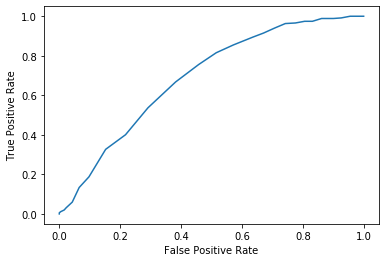

In [22]:
from sklearn.metrics import confusion_matrix,f1_score,balanced_accuracy_score,accuracy_score,roc_auc_score,roc_curve,precision_score,precision_recall_curve,roc_auc_score
import matplotlib.pyplot as plt
confusion_matrix(y_test,prediction)
#importing confusin_matrix for for model performance and best model is here build by svm
y_pred_proba=rf.predict_proba(X_test_skied)[::,1]

y_pred_proba

fpr,tpr,thresholds=roc_curve(y_test,y_pred_proba)



plt.plot(fpr,tpr)

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')



In [23]:
precision_score(y_test,prediction)

0.6503496503496503

In [24]:
f1_score(y_test,prediction)

0.5830721003134797

In [25]:
balanced_accuracy_score(y_test,prediction)

0.7169008557667498

In [26]:
accuracy_score(y_test,prediction)

0.8112136266855926

In [27]:
roc_auc_score(y_test,prediction)

0.7169008557667498

In [28]:
#importing GassianNB for building model
from sklearn.naive_bayes import GaussianNB
classify = GaussianNB()
classify.fit(X_train_scaled,y_train)
predicted=classify.predict(X_test_skied)
predicted

array([1, 0, 1, ..., 0, 0, 0], dtype=int64)

Text(0, 0.5, 'True Positive Rate')

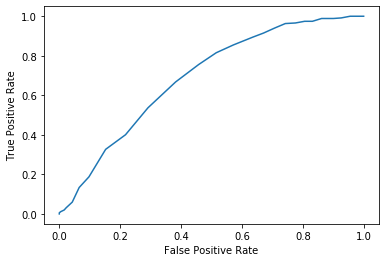

In [29]:
confusion_matrix(y_test,predicted) #importing confusin_matrix for for model performance by naive bayes

y_pred_proba=rf.predict_proba(X_test_skied)[::,1]

y_pred_proba

fpr,tpr,thresholds=roc_curve(y_test,y_pred_proba)



plt.plot(fpr,tpr)

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')


In [30]:
precision_score(y_test,predicted)

0.5212121212121212

In [31]:
f1_score(y_test,predicted)

0.6092089728453365

In [32]:
balanced_accuracy_score(y_test,predicted)

0.7543675281671971

In [33]:
accuracy_score(y_test,predicted)

0.7650816181689141

In [34]:
roc_auc_score(y_test,predicted)

0.754367528167197

In [35]:
#importing randomforestclassifier for building model
from sklearn.ensemble import RandomForestClassifier
rf1 = RandomForestClassifier(n_estimators=75,max_depth = 7,min_samples_leaf = 2,min_samples_split = 5,random_state=42)
rf1.fit(X_train_scaled,y_train)
pred1=rf.predict(X_test_skied)
pred1


array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

Text(0, 0.5, 'True Positive Rate')

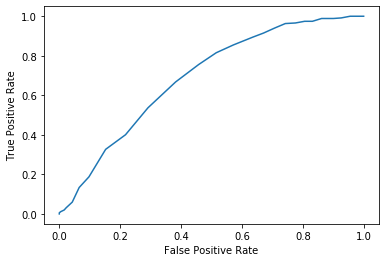

In [36]:
confusion_matrix(y_test,pred1) #importing confusin_matrix for for model performance by randomforestclassifier

y_pred_proba=rf.predict_proba(X_test_skied)[::,1]

y_pred_proba

fpr,tpr,thresholds=roc_curve(y_test,y_pred_proba)



plt.plot(fpr,tpr)

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')


In [37]:
precision_score(y_test,pred1)

0.3905325443786982

In [38]:
f1_score(y_test,pred1)

0.2533589251439539

In [39]:
balanced_accuracy_score(y_test,pred1)

0.5450271996215705

In [40]:
accuracy_score(y_test,pred1)

0.7239176721078779

In [41]:
roc_auc_score(y_test,pred1)

0.5450271996215704